# CiFAR-10 dataset

more info:

https://www.cs.toronto.edu/~kriz/cifar.html

We will use convolutional Neural Network

watch this video for more detail
https://www.youtube.com/watch?v=Y1qxI-Df4Lk

## code 

https://linuxtut.com/en/0c9499a7dc124d6d2f40/

![cnn_over_view](./assets/cnn_overview.png)

![convolution_filter](./assets/convolution_filter.png)

![formula_for_dimension_output](./assets/formula_for_dimension_output.png)




# imports

In [1]:
import torch
from torch.utils.data import dataloader
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# configs

device = "cuda" if torch.cuda.is_available() else "cpu"


In [3]:
# hyper parameters
batch_size = 4

kernel_size = 5
max_pooling_size = 2
stride_for_max_pooling = 2



# Dataset preparation

In [4]:
composed_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
train_dataset = torchvision.datasets.CIFAR10(
    root="./data/cifar/",
    train=True,
    download=True,
    transform = composed_transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root="./data/cifar/",
    train=False,
    download=True,
    transform = composed_transform
)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_dataset.data.shape,test_dataset.data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
classes = train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
# data loader
train_loader = dataloader.DataLoader(
    dataset=train_dataset,
    shuffle=True,
    batch_size=batch_size
    )
test_loader = dataloader.DataLoader(
    dataset=test_dataset,
    shuffle=False,
    batch_size=batch_size
)

In [9]:
all_batch = iter(train_loader)
first_batch = all_batch.next()

all_input_features_of_batch , targets = first_batch

all_input_features_of_batch.shape ,targets.shape



(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [10]:
all_input_features_of_batch[0],targets

(tensor([[[-0.9922, -1.0000, -1.0000,  ..., -0.5451, -0.3882, -0.4745],
          [-0.9922, -1.0000, -1.0000,  ..., -0.7333, -0.7961, -0.7569],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9608, -1.0000, -0.9922],
          ...,
          [-0.3569, -0.4510, -0.6235,  ..., -0.1922, -0.2000,  0.1686],
          [-0.2157, -0.2941, -0.3255,  ...,  0.6863,  0.6627,  0.5529],
          [-0.1137, -0.1137, -0.0510,  ...,  0.8039,  0.8510,  0.7725]],
 
         [[-0.9922, -1.0000, -1.0000,  ..., -0.4980, -0.2863, -0.4039],
          [-0.9922, -1.0000, -1.0000,  ..., -0.6941, -0.7412, -0.7333],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.9922, -0.9843],
          ...,
          [-0.4039, -0.5137, -0.7176,  ..., -0.8510, -0.8118, -0.2863],
          [-0.2627, -0.3725, -0.4196,  ..., -0.7098, -0.7255, -0.6941],
          [-0.1608, -0.1686, -0.1059,  ..., -0.6863, -0.6941, -0.6706]],
 
         [[-0.9922, -1.0000, -1.0000,  ..., -0.2392, -0.0039, -0.1059],
          [-0.9922, -1.0000,

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
(3, 36, 138)
(36, 138, 3)


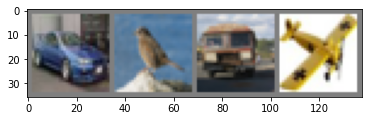

automobile  bird truck airplane


In [11]:
#Try to display the downloaded image
def imshow(img):
    #Denormalize
    img = img / 2 + 0.5
    # torch.From tensor type to numpy.Convert to ndarray type
    print(type(img)) # <class 'torch.Tensor'>
    npimg = img.numpy()
    print(type(npimg))    
    #Convert shape from (RGB, vertical, horizontal) to (vertical, horizontal, RGB)
    print(npimg.shape)
    npimg = np.transpose(npimg, (1, 2, 0))
    print(npimg.shape)
    #Display image
    plt.imshow(npimg)
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Neural Network Design

In [12]:
all_batch = iter(train_loader)
first_batch = all_batch.next()

all_input_features_of_batch , targets = first_batch

input_channel = 3

conv_1_out_channel = 6

kernel_size = 5

max_pool_kernel_size = 2
max_pool_stride = 2

conv2_in_channels = conv_1_out_channel
conv2_out_channels = 16

linear_1_in_dim = 16 * 5 * 5

convolution_1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)

max_pool = nn.MaxPool2d(kernel_size=2,stride=2)

convolution_2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)


x = all_input_features_of_batch
print(f"input_shape: {x.shape}")

x = convolution_1(x)
print(f"convolution_1: {x.shape}")

x = max_pool(x)
print(f"max_pool: {x.shape}")

x = convolution_2(x)
print(f"convolution_2: {x.shape}")

x = max_pool(x)
print(f"max_pool: {x.shape}")




input_shape: torch.Size([4, 3, 32, 32])
convolution_1: torch.Size([4, 6, 28, 28])
max_pool: torch.Size([4, 6, 14, 14])
convolution_2: torch.Size([4, 16, 10, 10])
max_pool: torch.Size([4, 16, 5, 5])


In [13]:
class NeuralNetwork(nn.Module):
    
    def __init__(self) -> None:
        super(NeuralNetwork,self).__init__()

        self.convolution_1 = nn.Conv2d(in_channels=input_channel,out_channels=conv_1_out_channel,kernel_size=kernel_size)

        self.max_pool = nn.MaxPool2d(kernel_size=max_pool_kernel_size,stride=max_pool_stride)

        self.convolution_2 = nn.Conv2d(in_channels=conv2_in_channels,out_channels=conv2_out_channels,kernel_size=kernel_size)

        self.linear1 = nn.Linear(in_features= linear_1_in_dim,out_features=100)

        self.linear2 = nn.Linear(in_features=100,out_features=84)

        self.linear3 = nn.Linear(in_features=84,out_features=10)
    

    def forward(self, batch_samples):
        out = batch_samples

        out = self.max_pool(F.relu(self.convolution_1(out))) # convolution layer 1

        out = self.max_pool(F.relu(self.convolution_2(out))) # convolution layer 2

        out = out.view(-1,linear_1_in_dim) # flattening the dimension 

        out = F.relu(self.linear1(out)) # first linear layer

        out = F.relu(self.linear2(out)) # second linear layer

        # don't use relu at last layer because cross Entropy automatically apply that
        out = self.linear3(out) # third linear layer

        return out


model = NeuralNetwork().to(device)

        

# Criterion and Optimizer

In [14]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.01

# optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training Loop

In [15]:
number_of_epoch = 2

for epoch in range(number_of_epoch):
    running_loss = 0.0
    for i , (batch_inputs,label) in enumerate(train_loader):
        optimizer.zero_grad()

        batch_inputs = batch_inputs.to(device)
        label = label.to(device)
        
        y_predict = model(batch_inputs)

        loss = criterion(y_predict,label)

        loss.backward()

        optimizer.step()


        running_loss += loss.item()
        if (i+1) %  1250 == 0:
            print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / train_dataset.data.shape[0]))
            running_loss = 0.0
print('Finished Training')



[1,  1250] loss: 0.056528
[1,  2500] loss: 0.049088
[1,  3750] loss: 0.044812
[1,  5000] loss: 0.041758
[1,  6250] loss: 0.040474
[1,  7500] loss: 0.039390
[1,  8750] loss: 0.038883
[1, 10000] loss: 0.037846
[1, 11250] loss: 0.037121
[1, 12500] loss: 0.035829
[2,  1250] loss: 0.035276
[2,  2500] loss: 0.033972
[2,  3750] loss: 0.033754
[2,  5000] loss: 0.033378
[2,  6250] loss: 0.033611
[2,  7500] loss: 0.033220
[2,  8750] loss: 0.032856
[2, 10000] loss: 0.032690
[2, 11250] loss: 0.032072
[2, 12500] loss: 0.031355
Finished Training


# Calculating Accuray

In [16]:
correct = 0
total = 0
#Calculate without remembering the gradient (without learning)
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


# Accuracy for each Classes

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 55 %
Accuracy of automobile : 65 %
Accuracy of  bird : 44 %
Accuracy of   cat : 55 %
Accuracy of  deer : 46 %
Accuracy of   dog : 36 %
Accuracy of  frog : 49 %
Accuracy of horse : 62 %
Accuracy of  ship : 74 %
Accuracy of truck : 69 %
